err:  3.1625427507120385e-05


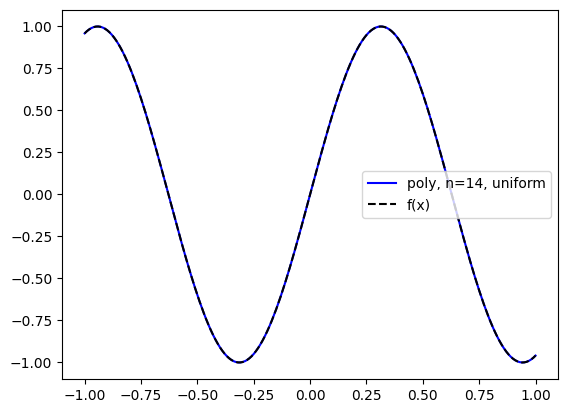

In [1]:
# Aim at reproducing Figure 2.8 in the lecture notes

import numpy as np
import matplotlib.pyplot as plt

f = lambda x: np.sin(5*x)

n = 14; # polynomial degree
x = np.linspace(-1, 1, n + 1)  # interpolation nodes
y = f(x)

p_coef = np.polyfit(x, y, n)
xfine = np.linspace(-1, 1, 201)  # fine grid
p = np.polyval(p_coef, xfine)

plt.plot(xfine, p, "b")
plt.plot(xfine, f(xfine), "k--")
plt.legend(["poly, n=14, uniform", "f(x)"])

print("err: ", max(abs(p-f(xfine))))

err:  0.4331358327625112


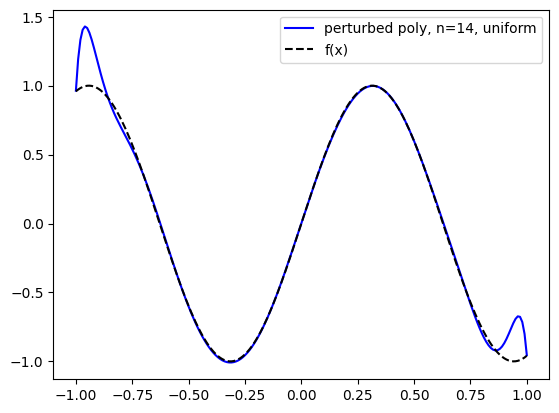

In [2]:
# Now perturb the data by random noise of size at most 0.01

pert  = ( (2*np.random.rand(n+1))-1 )*0.01;
ypert = y + pert;

p_coef = np.polyfit(x, ypert, n)

p = np.polyval(p_coef, xfine)

plt.plot(xfine, p, "b")
plt.plot(xfine, f(xfine), "k--")
plt.legend(["perturbed poly, n=14, uniform", "f(x)"])

print("err: ", max(abs(p-f(xfine))))


err:  1.9506691120163566e-06


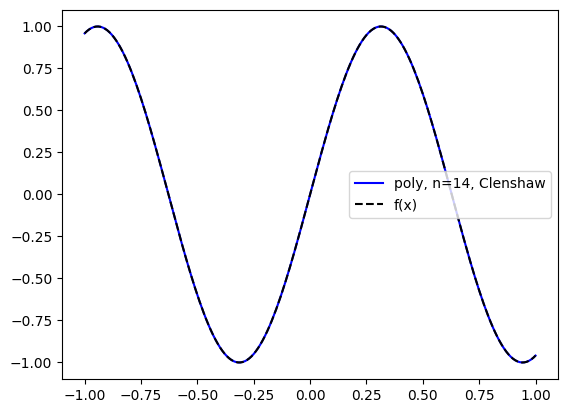

In [3]:
# Use Clenshaw-Curtis nodes

xclenshaw = np.cos( np.linspace(0, np.pi, n + 1) )

y = f(xclenshaw)

p_coef = np.polyfit(xclenshaw, y, n)
p = np.polyval(p_coef, xfine)

plt.plot(xfine, p, "b")
plt.plot(xfine, f(xfine), "k--")
plt.legend(["poly, n=14, Clenshaw", "f(x)"])

print("err: ", max(abs(p-f(xfine))))

err:  0.013443467762397132


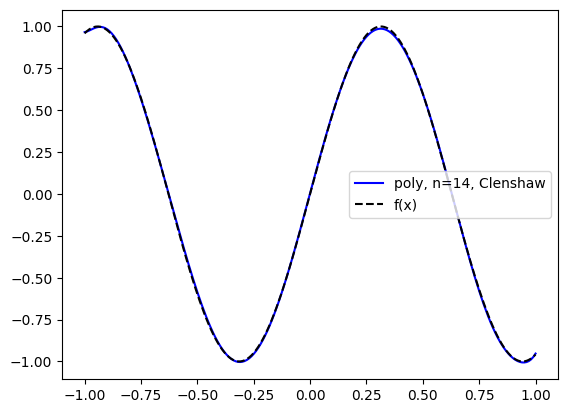

In [4]:
# Now perturb the data by random noise of size at most 0.01

pert  = ( (2*np.random.rand(n+1))-1 )*0.01;
ypert = y + pert;

p_coef = np.polyfit(xclenshaw, ypert, n)
p = np.polyval(p_coef, xfine)

plt.plot(xfine, p, "b")
plt.plot(xfine, f(xfine), "k--")
plt.legend(["poly, n=14, Clenshaw", "f(x)"])

print("err: ", max(abs(p-f(xfine))))